# Importando as bibliotecas 

In [1]:
import pandas as pd
import wget
from zipfile import ZipFile
import matplotlib.pyplot as plt
import yfinance as yf
import investpy as inv
import numpy as np

## Pegando os dados que eu vou usar para a análise 

In [2]:
dre = pd.read_csv(f'dados_prontos/dfp_cia_aberta_DRE_con_2010-2020.csv', sep=',', decimal=',', encoding='ISO-8859-1')
dre = dre[dre['ORDEM_EXERC'] == 'ÃLTIMO']

In [3]:
dre

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_INI_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
1,00.000.000/0001-91,2010-12-31,3,BCO BRASIL S.A.,1023,DF Consolidado - DemonstraÃ§Ã£o do Resultado,REAL,MIL,ÃLTIMO,2010-01-01,2010-12-31,3.01,Receitas da IntermediaÃ§Ã£o Financeira,85143206.0000000000,S
3,00.000.000/0001-91,2010-12-31,3,BCO BRASIL S.A.,1023,DF Consolidado - DemonstraÃ§Ã£o do Resultado,REAL,MIL,ÃLTIMO,2010-01-01,2010-12-31,3.01.01,Receita de Juros,85143206.0000000000,S
5,00.000.000/0001-91,2010-12-31,3,BCO BRASIL S.A.,1023,DF Consolidado - DemonstraÃ§Ã£o do Resultado,REAL,MIL,ÃLTIMO,2010-01-01,2010-12-31,3.02,Despesas da IntermediaÃ§Ã£o Financeira,-50775741.0000000000,S
7,00.000.000/0001-91,2010-12-31,3,BCO BRASIL S.A.,1023,DF Consolidado - DemonstraÃ§Ã£o do Resultado,REAL,MIL,ÃLTIMO,2010-01-01,2010-12-31,3.02.01,Despesa de Juros,-43061187.0000000000,S
9,00.000.000/0001-91,2010-12-31,3,BCO BRASIL S.A.,1023,DF Consolidado - DemonstraÃ§Ã£o do Resultado,REAL,MIL,ÃLTIMO,2010-01-01,2010-12-31,3.02.02,Despesa com ProvisÃ£o para Perdas em EmprÃ©stimos,-7714554.0000000000,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253640,88.613.658/0001-10,2020-06-30,1,PETTENATI S.A. INDUSTRIA TEXTIL,9539,DF Consolidado - DemonstraÃ§Ã£o do Resultado,REAL,UNIDADE,ÃLTIMO,2019-07-01,2020-06-30,3.99.01.01,ON,0.0000000000,N
253642,88.613.658/0001-10,2020-06-30,1,PETTENATI S.A. INDUSTRIA TEXTIL,9539,DF Consolidado - DemonstraÃ§Ã£o do Resultado,REAL,UNIDADE,ÃLTIMO,2019-07-01,2020-06-30,3.99.01.02,PN,0.0000000000,N
253644,88.613.658/0001-10,2020-06-30,1,PETTENATI S.A. INDUSTRIA TEXTIL,9539,DF Consolidado - DemonstraÃ§Ã£o do Resultado,REAL,UNIDADE,ÃLTIMO,2019-07-01,2020-06-30,3.99.02,Lucro DiluÃ­do por AÃ§Ã£o,0.0000000000,N
253646,88.613.658/0001-10,2020-06-30,1,PETTENATI S.A. INDUSTRIA TEXTIL,9539,DF Consolidado - DemonstraÃ§Ã£o do Resultado,REAL,UNIDADE,ÃLTIMO,2019-07-01,2020-06-30,3.99.02.01,ON,0.0000000000,N


## Identificando as empresas, vamos comparar CIELO com ITAÚSA

In [4]:
empresa = dre[['DENOM_CIA', 'CD_CVM']].drop_duplicates().set_index('CD_CVM')

In [5]:
empresa

,DENOM_CIA
CD_CVM,
1023,BCO BRASIL S.A.
14206,BRB BCO DE BRASILIA S.A.
2437,CENTRAIS ELET BRAS S.A. - ELETROBRAS
14451,CIA ENERGETICA DE BRASILIA
14540,VBC ENERGIA SA
...,...
24856,UP ENGENHARIA E URBANISMO S.A.
24953,"ALLPARK EMPREENDIMENTOS, PARTICIPAÃÃES E SER..."
13439,METALURGICA RIOSULENSE S.A.


## Selecionando as empresas

In [6]:
CIELO = pd.DataFrame()
ITAUSA = pd.DataFrame()

In [7]:
CIELO = dre[dre['CD_CVM'] == 21733]
ITAUSA = dre[dre['CD_CVM'] == 7617]

In [8]:
CIELO

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_INI_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
949,01.027.058/0001-91,2010-12-31,3,CIELO S.A.,21733,DF Consolidado - DemonstraÃ§Ã£o do Resultado,REAL,MIL,ÃLTIMO,2010-01-01,2010-12-31,3.01,Receita de Venda de Bens e/ou ServiÃ§os,3992494.0000000000,S
951,01.027.058/0001-91,2010-12-31,3,CIELO S.A.,21733,DF Consolidado - DemonstraÃ§Ã£o do Resultado,REAL,MIL,ÃLTIMO,2010-01-01,2010-12-31,3.02,Custo dos Bens e/ou ServiÃ§os Vendidos,-1180827.0000000000,S
953,01.027.058/0001-91,2010-12-31,3,CIELO S.A.,21733,DF Consolidado - DemonstraÃ§Ã£o do Resultado,REAL,MIL,ÃLTIMO,2010-01-01,2010-12-31,3.03,Resultado Bruto,2811667.0000000000,S
955,01.027.058/0001-91,2010-12-31,3,CIELO S.A.,21733,DF Consolidado - DemonstraÃ§Ã£o do Resultado,REAL,MIL,ÃLTIMO,2010-01-01,2010-12-31,3.04,Despesas/Receitas Operacionais,-441046.0000000000,S
957,01.027.058/0001-91,2010-12-31,3,CIELO S.A.,21733,DF Consolidado - DemonstraÃ§Ã£o do Resultado,REAL,MIL,ÃLTIMO,2010-01-01,2010-12-31,3.04.01,Despesas com Vendas,0.0000000000,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228350,01.027.058/0001-91,2019-12-31,2,CIELO S.A.,21733,DF Consolidado - DemonstraÃ§Ã£o do Resultado,REAL,MIL,ÃLTIMO,2019-01-01,2019-12-31,3.99,Lucro por AÃ§Ã£o - (Reais / AÃ§Ã£o),0.0000000000,N
228352,01.027.058/0001-91,2019-12-31,2,CIELO S.A.,21733,DF Consolidado - DemonstraÃ§Ã£o do Resultado,REAL,MIL,ÃLTIMO,2019-01-01,2019-12-31,3.99.01,Lucro BÃ¡sico por AÃ§Ã£o,0.0000000000,N
228354,01.027.058/0001-91,2019-12-31,2,CIELO S.A.,21733,DF Consolidado - DemonstraÃ§Ã£o do Resultado,REAL,MIL,ÃLTIMO,2019-01-01,2019-12-31,3.99.01.01,ON,0.5838500000,N
228356,01.027.058/0001-91,2019-12-31,2,CIELO S.A.,21733,DF Consolidado - DemonstraÃ§Ã£o do Resultado,REAL,MIL,ÃLTIMO,2019-01-01,2019-12-31,3.99.02,Lucro DiluÃ­do por AÃ§Ã£o,0.0000000000,N


In [9]:
ITAUSA

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_INI_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
20638,61.532.644/0001-15,2010-12-31,1,ITAUSA S.A.,7617,DF Consolidado - DemonstraÃ§Ã£o do Resultado,REAL,MIL,ÃLTIMO,2010-01-01,2010-12-31,3.01,Receita de Venda de Bens e/ou ServiÃ§os,5240000.0000000000,S
20640,61.532.644/0001-15,2010-12-31,1,ITAUSA S.A.,7617,DF Consolidado - DemonstraÃ§Ã£o do Resultado,REAL,MIL,ÃLTIMO,2010-01-01,2010-12-31,3.02,Custo dos Bens e/ou ServiÃ§os Vendidos,-3624000.0000000000,S
20642,61.532.644/0001-15,2010-12-31,1,ITAUSA S.A.,7617,DF Consolidado - DemonstraÃ§Ã£o do Resultado,REAL,MIL,ÃLTIMO,2010-01-01,2010-12-31,3.03,Resultado Bruto,1616000.0000000000,S
20644,61.532.644/0001-15,2010-12-31,1,ITAUSA S.A.,7617,DF Consolidado - DemonstraÃ§Ã£o do Resultado,REAL,MIL,ÃLTIMO,2010-01-01,2010-12-31,3.04,Despesas/Receitas Operacionais,-15830000.0000000000,S
20646,61.532.644/0001-15,2010-12-31,1,ITAUSA S.A.,7617,DF Consolidado - DemonstraÃ§Ã£o do Resultado,REAL,MIL,ÃLTIMO,2010-01-01,2010-12-31,3.04.01,Despesas com Vendas,0.0000000000,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248446,61.532.644/0001-15,2019-12-31,1,ITAUSA S.A.,7617,DF Consolidado - DemonstraÃ§Ã£o do Resultado,REAL,MIL,ÃLTIMO,2019-01-01,2019-12-31,3.99.01.01,ON,1.2300000000,N
248448,61.532.644/0001-15,2019-12-31,1,ITAUSA S.A.,7617,DF Consolidado - DemonstraÃ§Ã£o do Resultado,REAL,MIL,ÃLTIMO,2019-01-01,2019-12-31,3.99.01.02,PN,1.2300000000,N
248450,61.532.644/0001-15,2019-12-31,1,ITAUSA S.A.,7617,DF Consolidado - DemonstraÃ§Ã£o do Resultado,REAL,MIL,ÃLTIMO,2019-01-01,2019-12-31,3.99.02,Lucro DiluÃ­do por AÃ§Ã£o,0.0000000000,N
248452,61.532.644/0001-15,2019-12-31,1,ITAUSA S.A.,7617,DF Consolidado - DemonstraÃ§Ã£o do Resultado,REAL,MIL,ÃLTIMO,2019-01-01,2019-12-31,3.99.02.01,ON,1.2300000000,N


## Removendo os itens duplicados para selecionar a conta 

In [10]:
(CIELO[['CD_CONTA', 'DS_CONTA']].drop_duplicates().set_index('CD_CONTA'))

,DS_CONTA
CD_CONTA,
3.01,Receita de Venda de Bens e/ou ServiÃ§os
3.02,Custo dos Bens e/ou ServiÃ§os Vendidos
3.03,Resultado Bruto
3.04,Despesas/Receitas Operacionais
3.04.01,Despesas com Vendas
...,...
3.06.01.02,Resultado com AquisiÃ§Ã£o de RecebÃ­veis
3.06.01.02,Resultado com aquisiÃ§Ã£o de recebÃ­veis e FIDC
3.04.02.01,Gerais e Administrativas


In [11]:
(ITAUSA[['CD_CONTA', 'DS_CONTA']].drop_duplicates().set_index('CD_CONTA'))

,DS_CONTA
CD_CONTA,
3.01,Receita de Venda de Bens e/ou ServiÃ§os
3.02,Custo dos Bens e/ou ServiÃ§os Vendidos
3.03,Resultado Bruto
3.04,Despesas/Receitas Operacionais
3.04.01,Despesas com Vendas
3.04.02,Despesas Gerais e Administrativas
3.04.03,Perdas pela NÃ£o Recuperabilidade de Ativos
3.04.04,Outras Receitas Operacionais
3.04.05,Outras Despesas Operacionais


## Pegando o histórico dos valores 

In [12]:
conta_CIELO = CIELO[CIELO['CD_CONTA'] == '3.09']
print(conta_CIELO['VL_CONTA'])

1003      1830914.0000000000
26466     1816915.0000000000
52680     2320618.0000000000
78458     2680676.0000000000
103960    3228933.0000000000
129043    3651433.0000000000
153846    4183496.0000000000
178906    4264629.0000000000
203700    3559435.0000000000
228336    1789559.0000000000
Name: VL_CONTA, dtype: object


In [13]:
conta_ITAUSA = ITAUSA[ITAUSA['CD_CONTA'] == '3.09']
print(conta_ITAUSA['VL_CONTA'])

20690      5013000.0000000000
47018      5367000.0000000000
72942      5040000.0000000000
98446      6135000.0000000000
123493     8161000.0000000000
148518     8994000.0000000000
173608     8216000.0000000000
198306     8522000.0000000000
223100     9710000.0000000000
248428    10569000.0000000000
Name: VL_CONTA, dtype: object


## Pegando a cotação das ações 
* Adj Close = são as ajustadas pelos dividendos.
* Close = não são ajustadas pelos dividendos.

In [14]:
prices_CIELO = yf.download('CIEL3.SA', start='2011-01-01',interval='3mo')[['Adj Close', 'Close']]

[*********************100%***********************]  1 of 1 completed


In [15]:
prices_ITAUSA = yf.download('ITSA4.SA', start='2011-01-01',interval='3mo')[['Adj Close', 'Close']]

[*********************100%***********************]  1 of 1 completed


In [16]:
prices_CIELO

,Adj Close,Close
Date,,
2011-01-01,2.780481,6.91732
2011-03-15,NaN,NaN
2011-04-01,3.442222,7.83661
2011-05-02,NaN,NaN
2011-05-30,NaN,NaN
...,...,...
2020-01-31,NaN,NaN
2020-04-01,4.620000,4.62000
2020-07-01,3.930000,3.93000


In [17]:
prices_ITAUSA

,Adj Close,Close
Date,,
2011-01-01,4.060964,6.82577
2011-03-01,NaN,NaN
2011-04-01,3.947782,6.62165
2011-06-01,NaN,NaN
2011-07-01,3.144560,5.26308
...,...,...
2020-04-01,9.508682,9.59000
2020-07-01,8.745123,8.80000
2020-09-01,NaN,NaN


## Ajustando as datas 

In [18]:
conta_CIELO.index = pd.to_datetime(conta_CIELO['DT_REFER'])

In [19]:
conta_ITAUSA.index = pd.to_datetime(conta_ITAUSA['DT_REFER'])

In [20]:
conta_CIELO

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_INI_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
DT_REFER,,,,,,,,,,,,,,,
2010-12-31,01.027.058/0001-91,2010-12-31,3,CIELO S.A.,21733,DF Consolidado - DemonstraÃ§Ã£o do Resultado,REAL,MIL,ÃLTIMO,2010-01-01,2010-12-31,3.09,Resultado LÃ­quido das OperaÃ§Ãµes Continuadas,1830914.0000000000,S
2011-12-31,01.027.058/0001-91,2011-12-31,1,CIELO S.A.,21733,DF Consolidado - DemonstraÃ§Ã£o do Resultado,REAL,MIL,ÃLTIMO,2011-01-01,2011-12-31,3.09,Resultado LÃ­quido das OperaÃ§Ãµes Continuadas,1816915.0000000000,S
2012-12-31,01.027.058/0001-91,2012-12-31,1,CIELO S.A.,21733,DF Consolidado - DemonstraÃ§Ã£o do Resultado,REAL,MIL,ÃLTIMO,2012-01-01,2012-12-31,3.09,Resultado LÃ­quido das OperaÃ§Ãµes Continuadas,2320618.0000000000,S
2013-12-31,01.027.058/0001-91,2013-12-31,1,CIELO S.A.,21733,DF Consolidado - DemonstraÃ§Ã£o do Resultado,REAL,MIL,ÃLTIMO,2013-01-01,2013-12-31,3.09,Resultado LÃ­quido das OperaÃ§Ãµes Continuadas,2680676.0000000000,S
2014-12-31,01.027.058/0001-91,2014-12-31,1,CIELO S.A.,21733,DF Consolidado - DemonstraÃ§Ã£o do Resultado,REAL,MIL,ÃLTIMO,2014-01-01,2014-12-31,3.09,Resultado LÃ­quido das OperaÃ§Ãµes Continuadas,3228933.0000000000,S
2015-12-31,01.027.058/0001-91,2015-12-31,1,CIELO S.A.,21733,DF Consolidado - DemonstraÃ§Ã£o do Resultado,REAL,MIL,ÃLTIMO,2015-01-01,2015-12-31,3.09,Resultado LÃ­quido das OperaÃ§Ãµes Continuadas,3651433.0000000000,S
2016-12-31,01.027.058/0001-91,2016-12-31,1,CIELO S.A.,21733,DF Consolidado - DemonstraÃ§Ã£o do Resultado,REAL,MIL,ÃLTIMO,2016-01-01,2016-12-31,3.09,Resultado LÃ­quido das OperaÃ§Ãµes Continuadas,4183496.0000000000,S
2017-12-31,01.027.058/0001-91,2017-12-31,3,CIELO S.A.,21733,DF Consolidado - DemonstraÃ§Ã£o do Resultado,REAL,MIL,ÃLTIMO,2017-01-01,2017-12-31,3.09,Resultado LÃ­quido das OperaÃ§Ãµes Continuadas,4264629.0000000000,S
2018-12-31,01.027.058/0001-91,2018-12-31,1,CIELO S.A.,21733,DF Consolidado - DemonstraÃ§Ã£o do Resultado,REAL,MIL,ÃLTIMO,2018-01-01,2018-12-31,3.09,Resultado LÃ­quido das OperaÃ§Ãµes Continuadas,3559435.0000000000,S


In [21]:
conta_ITAUSA

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_INI_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
DT_REFER,,,,,,,,,,,,,,,
2010-12-31,61.532.644/0001-15,2010-12-31,1,ITAUSA S.A.,7617,DF Consolidado - DemonstraÃ§Ã£o do Resultado,REAL,MIL,ÃLTIMO,2010-01-01,2010-12-31,3.09,Resultado LÃ­quido das OperaÃ§Ãµes Continuadas,5013000.0000000000,S
2011-12-31,61.532.644/0001-15,2011-12-31,1,ITAUSA S.A.,7617,DF Consolidado - DemonstraÃ§Ã£o do Resultado,REAL,MIL,ÃLTIMO,2011-01-01,2011-12-31,3.09,Resultado LÃ­quido das OperaÃ§Ãµes Continuadas,5367000.0000000000,S
2012-12-31,61.532.644/0001-15,2012-12-31,1,ITAUSA S.A.,7617,DF Consolidado - DemonstraÃ§Ã£o do Resultado,REAL,MIL,ÃLTIMO,2012-01-01,2012-12-31,3.09,Resultado LÃ­quido das OperaÃ§Ãµes Continuadas,5040000.0000000000,S
2013-12-31,61.532.644/0001-15,2013-12-31,1,ITAUSA S.A.,7617,DF Consolidado - DemonstraÃ§Ã£o do Resultado,REAL,MIL,ÃLTIMO,2013-01-01,2013-12-31,3.09,Resultado LÃ­quido das OperaÃ§Ãµes Continuadas,6135000.0000000000,S
2014-12-31,61.532.644/0001-15,2014-12-31,1,ITAUSA S.A.,7617,DF Consolidado - DemonstraÃ§Ã£o do Resultado,REAL,MIL,ÃLTIMO,2014-01-01,2014-12-31,3.09,Resultado LÃ­quido das OperaÃ§Ãµes Continuadas,8161000.0000000000,S
2015-12-31,61.532.644/0001-15,2015-12-31,1,ITAUSA S.A.,7617,DF Consolidado - DemonstraÃ§Ã£o do Resultado,REAL,MIL,ÃLTIMO,2015-01-01,2015-12-31,3.09,Resultado LÃ­quido das OperaÃ§Ãµes Continuadas,8994000.0000000000,S
2016-12-31,61.532.644/0001-15,2016-12-31,1,ITAUSA S.A.,7617,DF Consolidado - DemonstraÃ§Ã£o do Resultado,REAL,MIL,ÃLTIMO,2016-01-01,2016-12-31,3.09,Resultado LÃ­quido das OperaÃ§Ãµes Continuadas,8216000.0000000000,S
2017-12-31,61.532.644/0001-15,2017-12-31,1,ITAUSA S.A.,7617,DF Consolidado - DemonstraÃ§Ã£o do Resultado,REAL,MIL,ÃLTIMO,2017-01-01,2017-12-31,3.09,Resultado LÃ­quido das OperaÃ§Ãµes Continuadas,8522000.0000000000,S
2018-12-31,61.532.644/0001-15,2018-12-31,1,ITAUSA S.A.,7617,DF Consolidado - DemonstraÃ§Ã£o do Resultado,REAL,MIL,ÃLTIMO,2018-01-01,2018-12-31,3.09,Resultado LÃ­quido das OperaÃ§Ãµes Continuadas,9710000.0000000000,S


## Jutando as 2 tabelas 

In [22]:
indicadores_CIELO = prices_CIELO.join(conta_CIELO['VL_CONTA'], how = 'outer')
indicadores_ITAUSA = prices_ITAUSA.join(conta_ITAUSA['VL_CONTA'], how = 'outer')

In [23]:
indicadores_CIELO

,Adj Close,Close,VL_CONTA
2010-12-31,NaN,NaN,1830914.0000000000
2011-01-01,2.780481,6.91732,NaN
2011-03-15,NaN,NaN,NaN
2011-04-01,3.442222,7.83661,NaN
2011-05-02,NaN,NaN,NaN
...,...,...,...
2020-01-31,NaN,NaN,NaN
2020-04-01,4.620000,4.62000,NaN
2020-07-01,3.930000,3.93000,NaN
2020-10-01,3.750000,3.75000,NaN


In [24]:
indicadores_ITAUSA

,Adj Close,Close,VL_CONTA
2010-12-31,NaN,NaN,5013000.0000000000
2011-01-01,4.060964,6.82577,NaN
2011-03-01,NaN,NaN,NaN
2011-04-01,3.947782,6.62165,NaN
2011-06-01,NaN,NaN,NaN
...,...,...,...
2020-04-01,9.508682,9.59000,NaN
2020-07-01,8.745123,8.80000,NaN
2020-09-01,NaN,NaN,NaN
2020-10-01,9.840000,9.84000,NaN


## Renomeando as colunas 

In [25]:
indicadores_CIELO.rename({'VL_CONTA':'LUCRO_EMPRESA'}, axis = 1, inplace = True)
indicadores_ITAUSA.rename({'VL_CONTA':'LUCRO_EMPRESA'}, axis = 1, inplace = True)

In [26]:
indicadores_CIELO

,Adj Close,Close,LUCRO_EMPRESA
2010-12-31,NaN,NaN,1830914.0000000000
2011-01-01,2.780481,6.91732,NaN
2011-03-15,NaN,NaN,NaN
2011-04-01,3.442222,7.83661,NaN
2011-05-02,NaN,NaN,NaN
...,...,...,...
2020-01-31,NaN,NaN,NaN
2020-04-01,4.620000,4.62000,NaN
2020-07-01,3.930000,3.93000,NaN
2020-10-01,3.750000,3.75000,NaN


In [27]:
indicadores_ITAUSA

,Adj Close,Close,LUCRO_EMPRESA
2010-12-31,NaN,NaN,5013000.0000000000
2011-01-01,4.060964,6.82577,NaN
2011-03-01,NaN,NaN,NaN
2011-04-01,3.947782,6.62165,NaN
2011-06-01,NaN,NaN,NaN
...,...,...,...
2020-04-01,9.508682,9.59000,NaN
2020-07-01,8.745123,8.80000,NaN
2020-09-01,NaN,NaN,NaN
2020-10-01,9.840000,9.84000,NaN


## Ajustando os campos nulos 

In [28]:
indicadores_CIELO.fillna(method='ffill', inplace=True)
indicadores_ITAUSA.fillna(method='ffill', inplace=True)

In [29]:
indicadores_CIELO

,Adj Close,Close,LUCRO_EMPRESA
2010-12-31,NaN,NaN,1830914.0000000000
2011-01-01,2.780481,6.91732,1830914.0000000000
2011-03-15,2.780481,6.91732,1830914.0000000000
2011-04-01,3.442222,7.83661,1830914.0000000000
2011-05-02,3.442222,7.83661,1830914.0000000000
...,...,...,...
2020-01-31,4.423268,4.44000,1789559.0000000000
2020-04-01,4.620000,4.62000,1789559.0000000000
2020-07-01,3.930000,3.93000,1789559.0000000000
2020-10-01,3.750000,3.75000,1789559.0000000000


In [30]:
indicadores_ITAUSA

,Adj Close,Close,LUCRO_EMPRESA
2010-12-31,NaN,NaN,5013000.0000000000
2011-01-01,4.060964,6.82577,5013000.0000000000
2011-03-01,4.060964,6.82577,5013000.0000000000
2011-04-01,3.947782,6.62165,5013000.0000000000
2011-06-01,3.947782,6.62165,5013000.0000000000
...,...,...,...
2020-04-01,9.508682,9.59000,10569000.0000000000
2020-07-01,8.745123,8.80000,10569000.0000000000
2020-09-01,8.745123,8.80000,10569000.0000000000
2020-10-01,9.840000,9.84000,10569000.0000000000


## Removendo os campos nulos 

In [31]:
indicadores_CIELO.dropna(inplace=True)
indicadores_ITAUSA.dropna(inplace=True)

In [32]:
indicadores_CIELO

,Adj Close,Close,LUCRO_EMPRESA
2011-01-01,2.780481,6.91732,1830914.0000000000
2011-03-15,2.780481,6.91732,1830914.0000000000
2011-04-01,3.442222,7.83661,1830914.0000000000
2011-05-02,3.442222,7.83661,1830914.0000000000
2011-05-30,3.442222,7.83661,1830914.0000000000
...,...,...,...
2020-01-31,4.423268,4.44000,1789559.0000000000
2020-04-01,4.620000,4.62000,1789559.0000000000
2020-07-01,3.930000,3.93000,1789559.0000000000
2020-10-01,3.750000,3.75000,1789559.0000000000


In [33]:
indicadores_ITAUSA

,Adj Close,Close,LUCRO_EMPRESA
2011-01-01,4.060964,6.82577,5013000.0000000000
2011-03-01,4.060964,6.82577,5013000.0000000000
2011-04-01,3.947782,6.62165,5013000.0000000000
2011-06-01,3.947782,6.62165,5013000.0000000000
2011-07-01,3.144560,5.26308,5013000.0000000000
...,...,...,...
2020-04-01,9.508682,9.59000,10569000.0000000000
2020-07-01,8.745123,8.80000,10569000.0000000000
2020-09-01,8.745123,8.80000,10569000.0000000000
2020-10-01,9.840000,9.84000,10569000.0000000000


## Tranformando os dados str em float para gerar o gráfico 

In [34]:
lucro_liquido_CIELO = list()
for conversao in range(len(indicadores_CIELO)):
    lucro_liquido_CIELO.append(float(indicadores_CIELO['LUCRO_EMPRESA'][conversao]))

In [35]:
lucro_liquido_ITAUSA = list()
for conversao in range(len(indicadores_ITAUSA)):
    lucro_liquido_ITAUSA.append(float(indicadores_ITAUSA['LUCRO_EMPRESA'][conversao]))

In [36]:
indicadores_CIELO['LUCRO_EMPRESA'] = lucro_liquido_CIELO
indicadores_ITAUSA['LUCRO_EMPRESA'] = lucro_liquido_ITAUSA

## Montando os 2 gráficos 

Text(0.5, 1.0, 'LUCRO vs PREÇO CIELO')

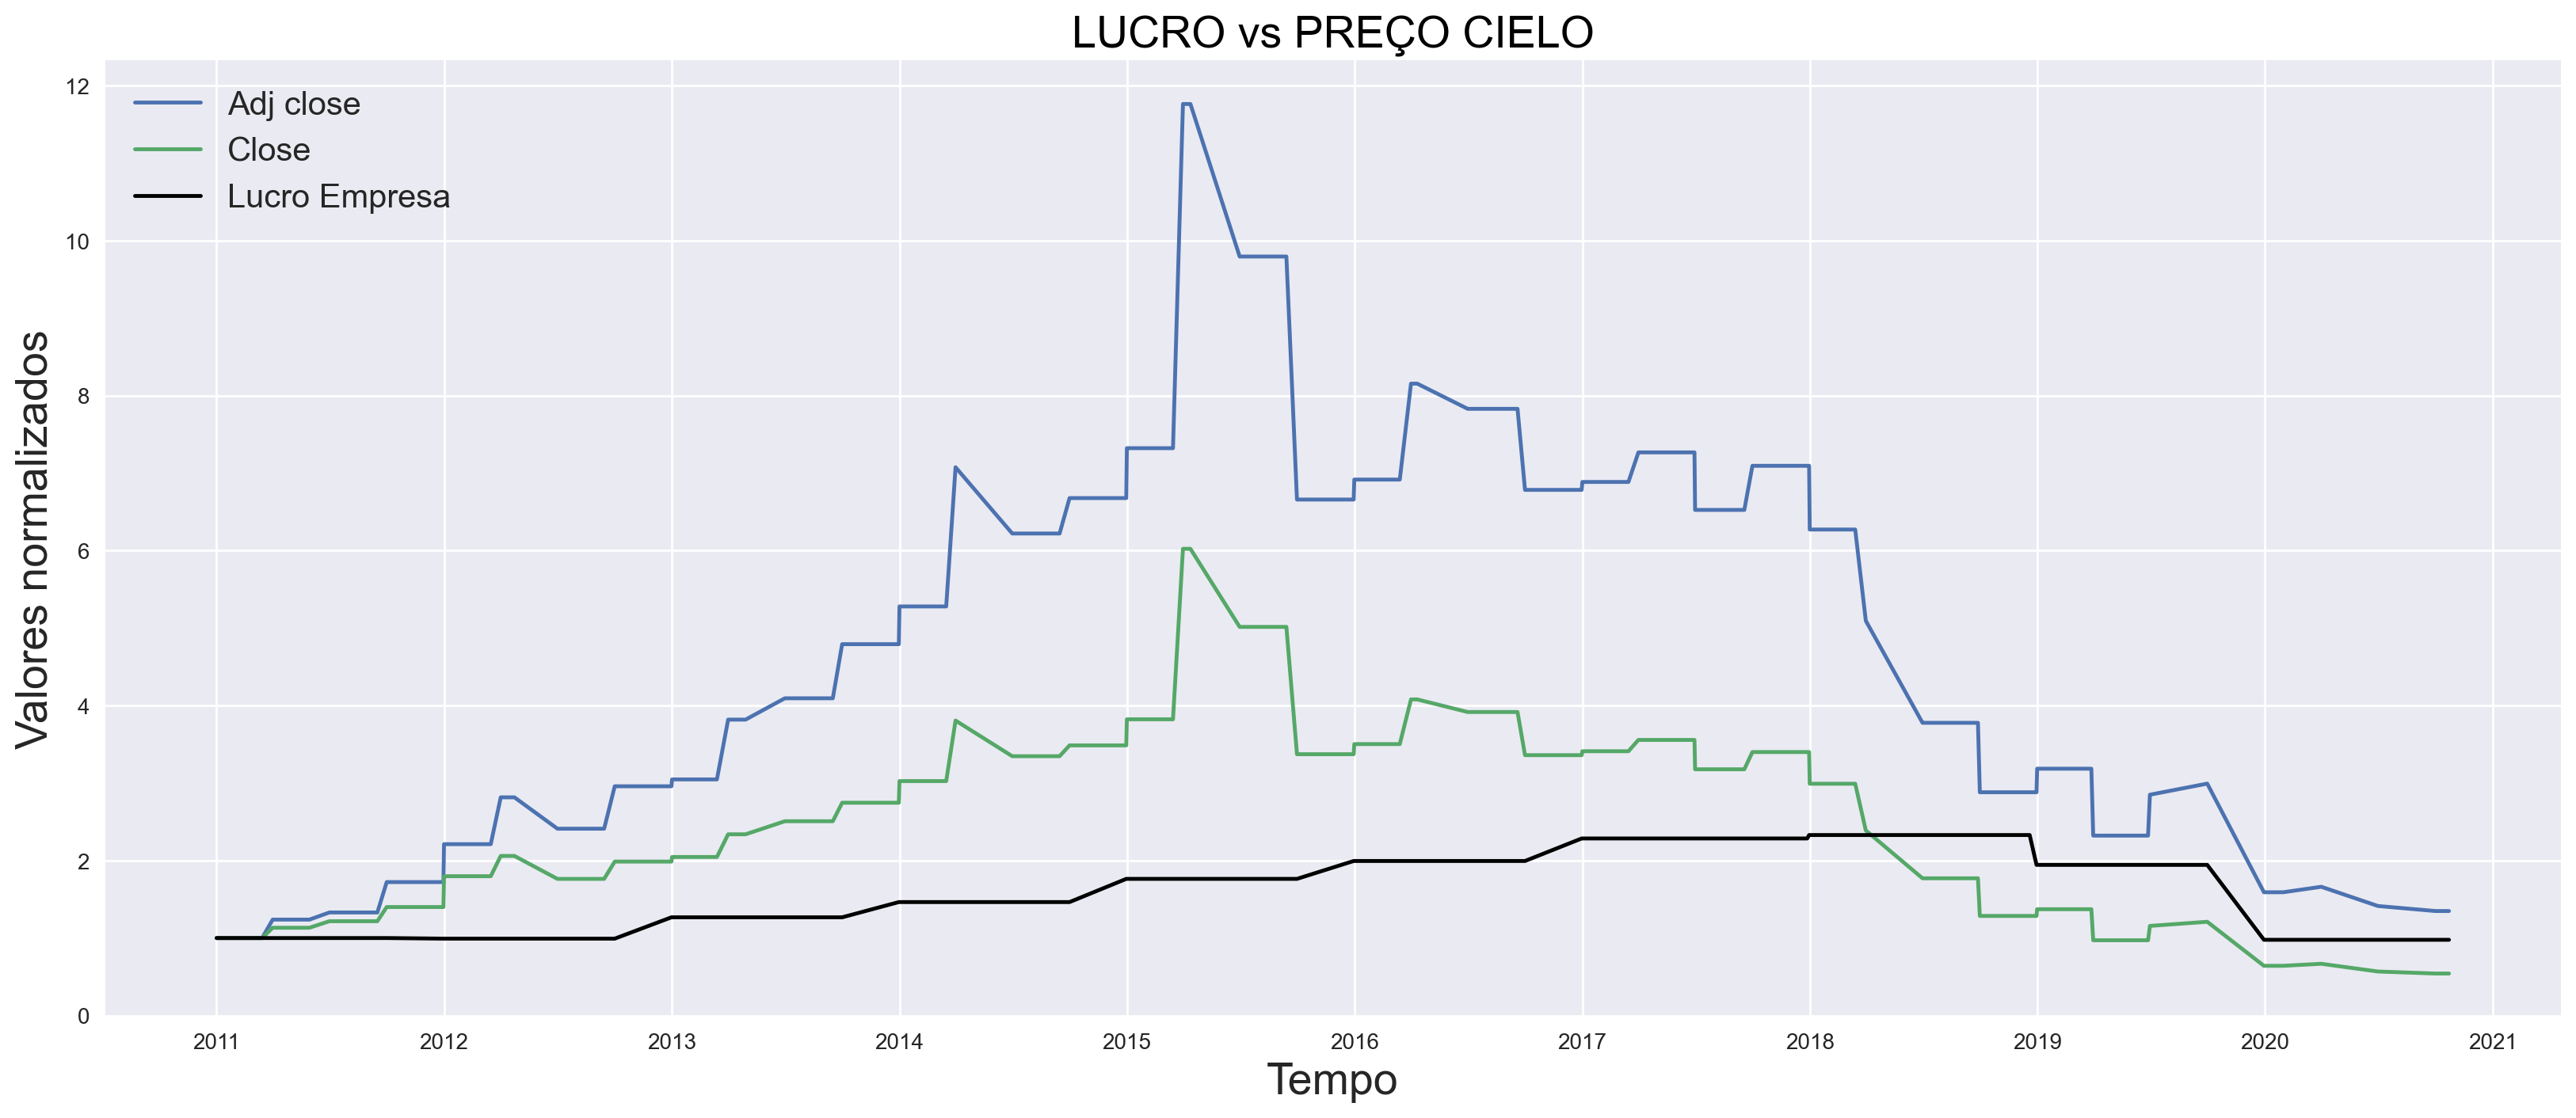

In [37]:
plt.figure(figsize=(20,8), dpi=200)
plt.style.use('seaborn')
plt.plot(indicadores_CIELO['Adj Close'] / indicadores_CIELO['Adj Close'][1], label = 'Adj close')
plt.plot(indicadores_CIELO['Close'] / indicadores_CIELO['Close'][1], label = 'Close')
plt.plot(indicadores_CIELO['LUCRO_EMPRESA'] / indicadores_CIELO['LUCRO_EMPRESA'][1], label = 'Lucro Empresa', color = 'black')
plt.legend(loc='best', fontsize = 15, mode = "expand")
plt.xlabel("Tempo", size = 20)
plt.ylabel("Valores normalizados", size = 20)
plt.title('LUCRO vs PREÇO CIELO', size = 20, color = 'black')

Text(0.5, 1.0, 'LUCRO vs PREÇO ITAUSA')

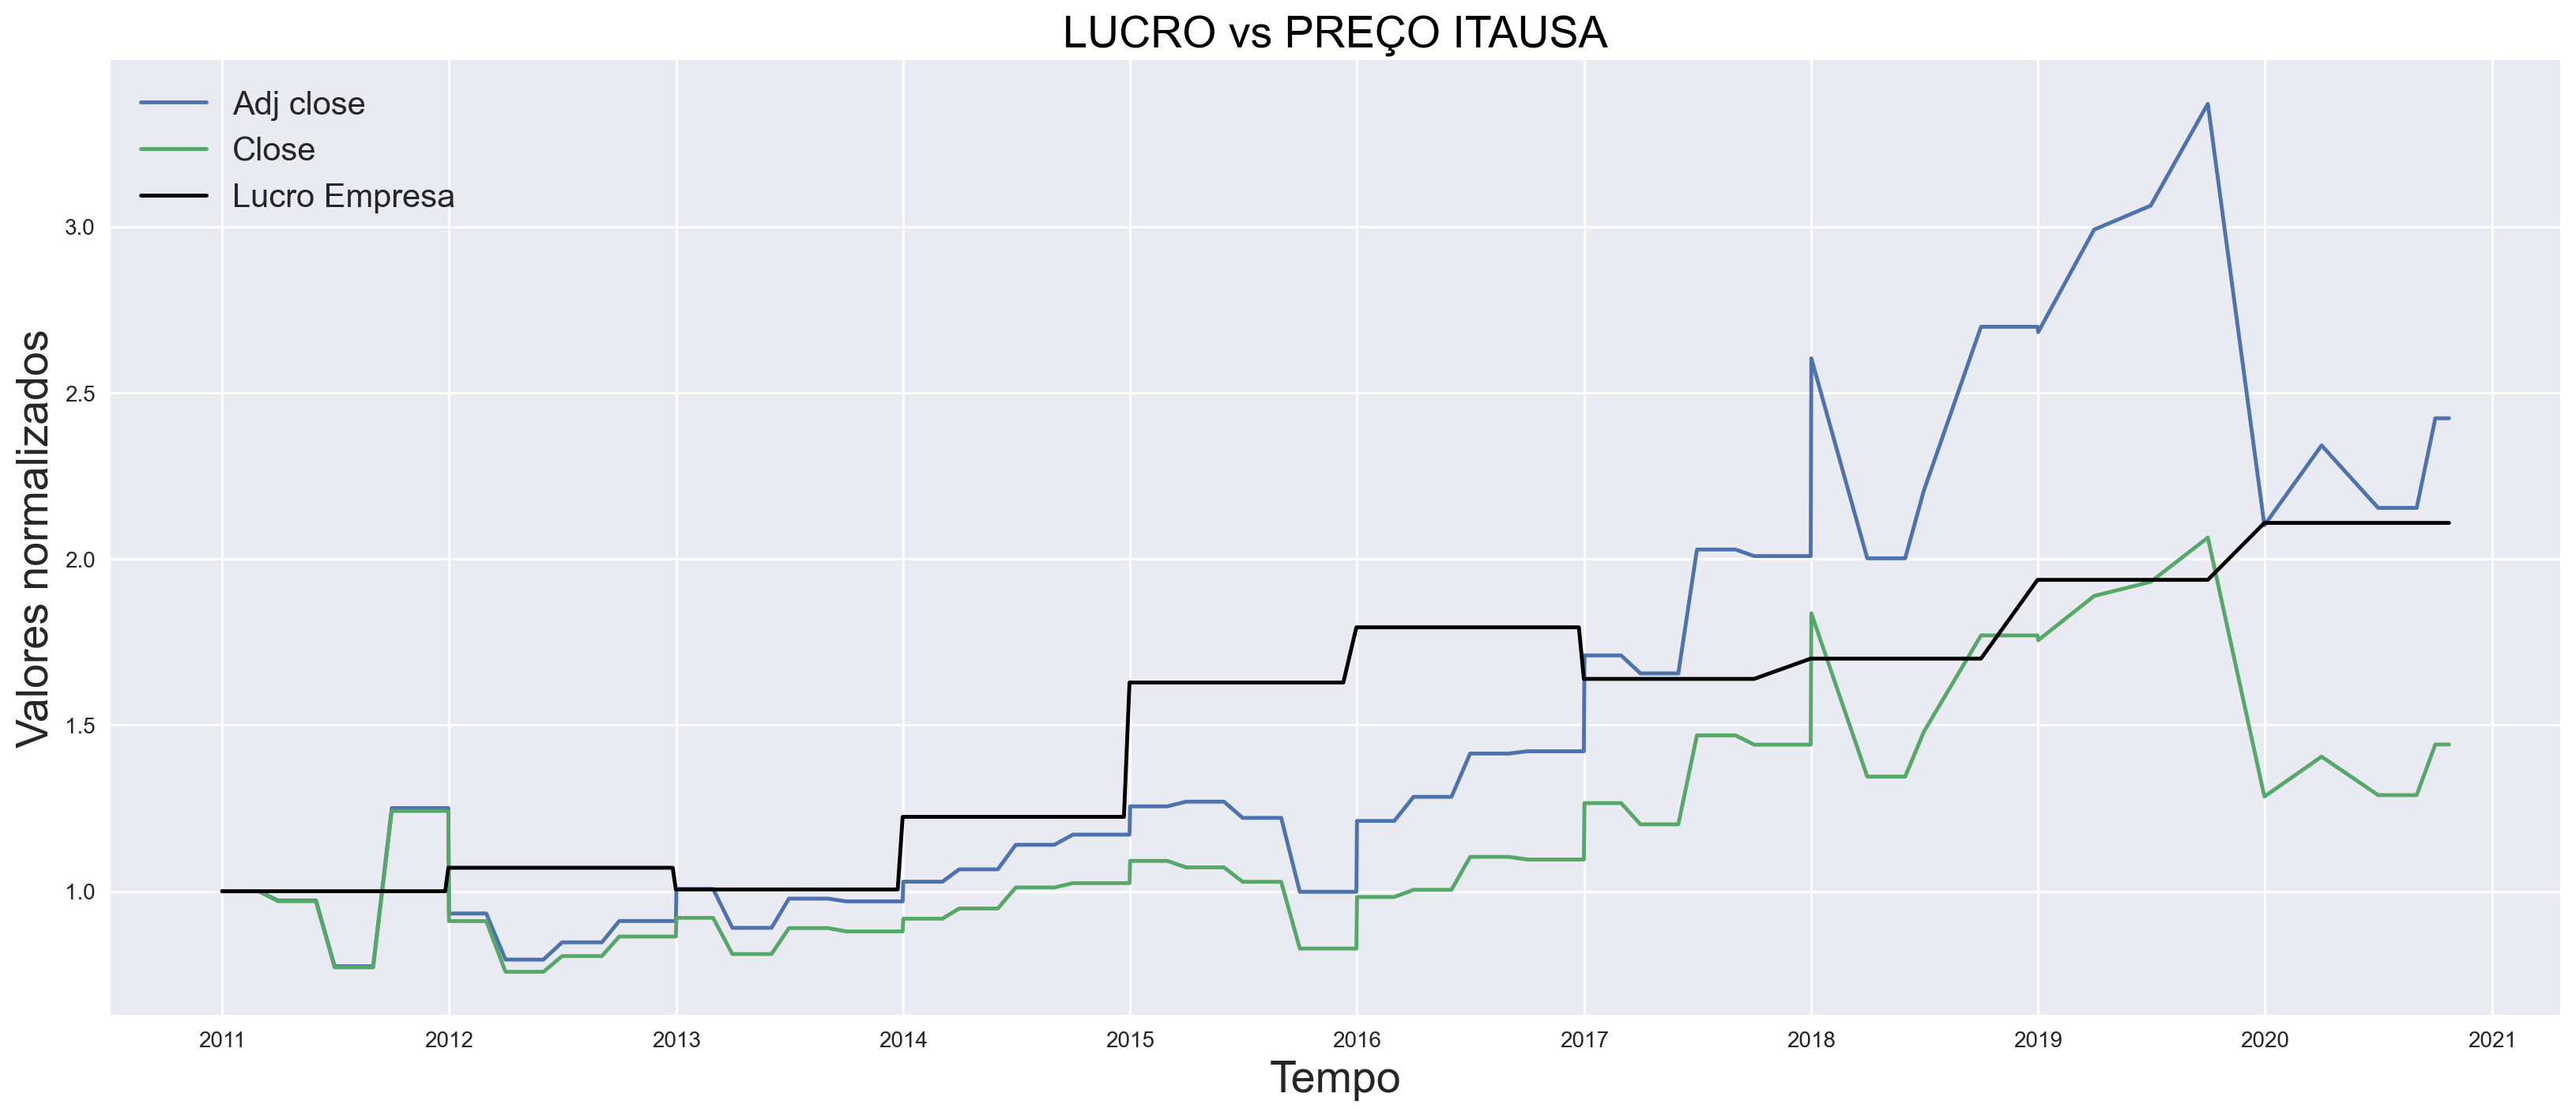

In [38]:
plt.figure(figsize=(20,8), dpi=200)
plt.style.use('seaborn')
plt.plot(indicadores_ITAUSA['Adj Close'] / indicadores_ITAUSA['Adj Close'][1], label = 'Adj close')
plt.plot(indicadores_ITAUSA['Close'] / indicadores_ITAUSA['Close'][1], label = 'Close')
plt.plot(indicadores_ITAUSA['LUCRO_EMPRESA'] / indicadores_ITAUSA['LUCRO_EMPRESA'][1], label = 'Lucro Empresa', color = 'black')
plt.legend(loc='best', fontsize = 15, mode = "expand")
plt.xlabel("Tempo", size = 20)
plt.ylabel("Valores normalizados", size = 20)
plt.title('LUCRO vs PREÇO ITAUSA', size = 20, color = 'black')